In [1]:
import os
#dir_ = "C:\\Users\\mqayum2\\Box\\Spring 2024\\Data Science\\Data Science Final Project"
dir_ = "C:/Users/zalian2\OneDrive - University of Illinois - Urbana/UIUC/Spring 2024/ACE 592 SAE/ACE_592_Project/Code"

os.chdir(dir_)

%run 22_Rating_Analysis.ipynb

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\zalian2\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zalian2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\zalian2\AppData\Local\Temp\ipykernel_12360\213065698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drug_1.drop(['Drug'], axis = 1, inplace = True)
C:\Users\zalian2\AppData\Local\Temp\ipykernel_12360\213065698.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drug_2.drop(['Drug

## LASSO

In [2]:
data.drop('Drug', axis = 1, inplace = True)

X = StandardScaler().fit_transform(data.iloc[:, :-1])

y = StandardScaler().fit_transform(data[['Rating']])


model = Lasso(alpha=.1)
model = model.fit(X=X,y=y)



C:\Users\zalian2\.conda\envs\ace-592-sae\Lib\site-packages\sklearn\base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\zalian2\.conda\envs\ace-592-sae\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\zalian2\.conda\envs\ace-592-sae\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.627e+02, tolerance: 6.770e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/R

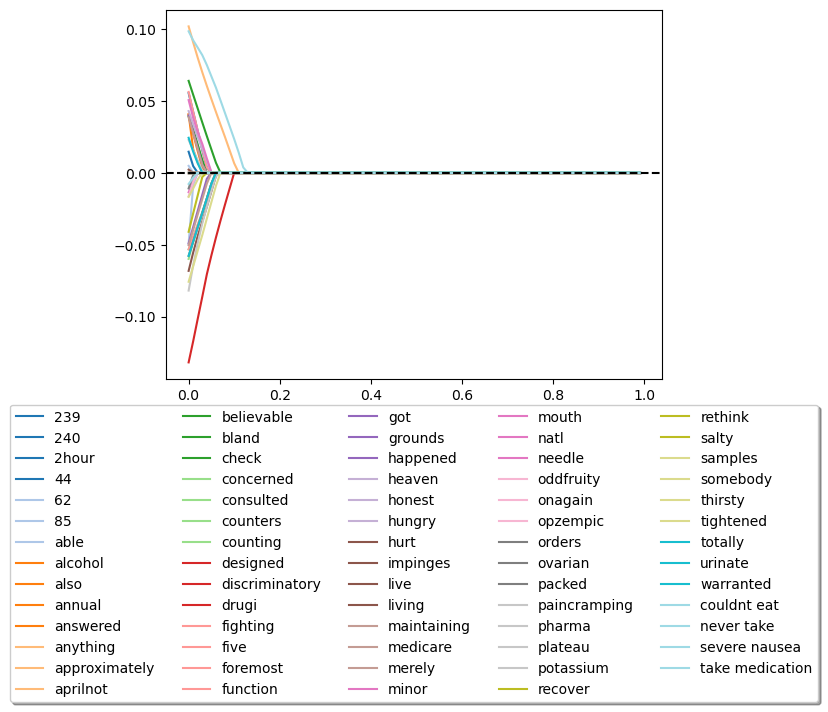

In [3]:
initial_words = list(data[words].loc[:,model.coef_!=0].columns)
# Get a list of all of the coefficients which are themselves a list for every value of the grid
Alpha = np.arange(0,1,.01)
out = [list(get_coefs(a,initial_words,['Rating'])) for a in Alpha]


OUT = pd.DataFrame(out).iloc[:, :len(initial_words)]
OUT.columns = initial_words
OUT.index = Alpha

                            #  word labels         alpha vals
# Plot it over alpha
OUT.plot(cmap="tab20") # this colormap is easier to see
plt.axhline(0,color='black',ls="--") # origin line
#plt.axvline(lasso_model.alpha_,color='black',ls="--") # a vertical line for the optimal value of alpha
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=5) # Putting the legend below the graph

In [4]:
Alpha = np.arange(0,.05,.001)
# Fitting the LassoCV model with 5-fold cross validation
lasso_model = LassoCV(alphas=Alpha,cv=5)

# Fit the data
lasso_model = lasso_model.fit(X=X,y=y)


C:\Users\zalian2\.conda\envs\ace-592-sae\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\zalian2\.conda\envs\ace-592-sae\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\zalian2\.conda\envs\ace-592-sae\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\zalian2\.conda\envs\ace-592-sae\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected re

In [5]:
lasso_model.alpha_

0.017

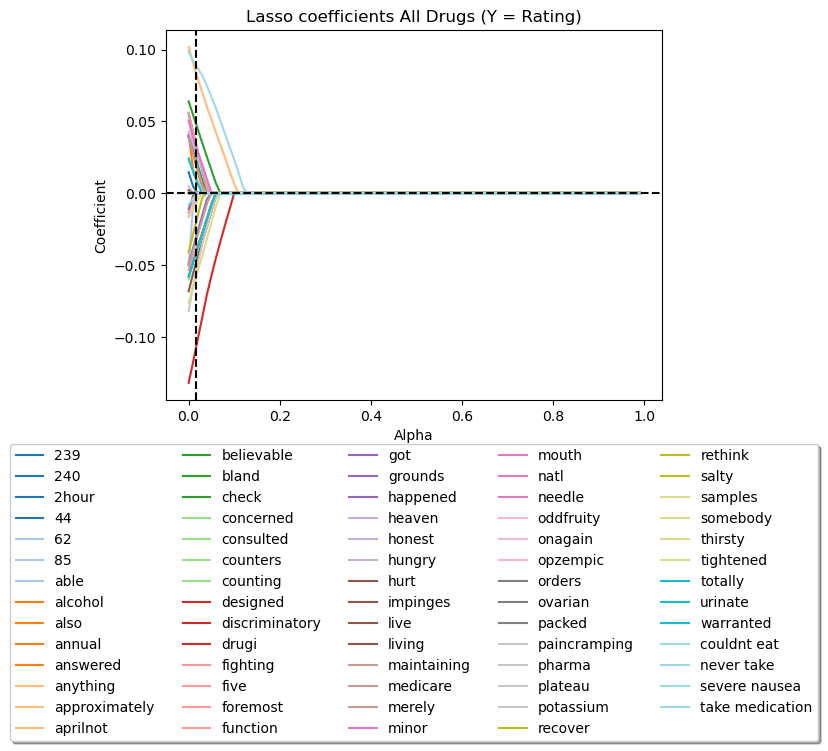

In [6]:
## Plotting again but after adding a vertical line for the optimal alpha value

# Plot it over alpha
OUT.plot(cmap="tab20") # this colormap is easier to see
plt.title("Lasso coefficients All Drugs (Y = Rating)")
plt.xlabel("Alpha")
plt.ylabel("Coefficient")
plt.axhline(0,color='black',ls="--") # origin line
plt.axvline(lasso_model.alpha_,color='black',ls="--") # a vertical line for the optimal value of alpha
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),fancybox=True, shadow=True, ncol=5) # Putting the legend below the graph

#### Since it is difficult to identify significant words from this chart, we decided to visualize them in word clouds, where the size of the words will increase as the size of the coefficient gets higher

 We want to visualize the positive words that are most predictive of high user rating score.
 We will show them in a word cloud. Even though a word cloud is usually created to present the frequencies of words, we will use it
 here to show the most predictive positive words. The way we will do it is that we will create an artifical "frequency" of the words
 such that the most positive words will have a higher frequency. Basically, this frequency will be based on the ranking of the word. In other words, as the size of the positive coefficient gets higher, the size of the words becomes larger, and the same goes for the negative words.

 We arbitrarily chose a cutoff for the positive words above to include a limited number of words. Now we will create a ranking
 column based on the coefficient value of the words

Which words were the most important?
We want to visualize the positive words that are most predictive of high rating and vice versa

In [7]:
final_words = list(data[words].loc[:,lasso_model.coef_!=0].columns)
final_coefs = pd.DataFrame([words,lasso_model.coef_]).T

final_coefs = final_coefs.set_index(0)

final_coefs = final_coefs[final_coefs[1]!=0]

import numpy as np
final_coefs["abs_"] = np.abs(final_coefs[1])
final_coefs.sort_values(by='abs_', ascending=False)


positive_words=final_coefs[final_coefs[1]>.02].sort_values(by=1, ascending=False).reset_index()

## We will repeat the process for negative words. We will choose the cutoff arbitrarily

negative_words=final_coefs[final_coefs[1]<-.05].sort_values(by=1, ascending=True).reset_index()

negative_words['ranking'] = negative_words['abs_'].rank(method='dense', ascending=True)
negative_words.dropna(inplace=True)
## Creating a dictionary of words and their "frequencies"/rankings
neg_dic = negative_words.set_index(0).to_dict()['ranking']



positive_words['ranking'] = positive_words['abs_'].rank(method='dense', ascending=True)
positive_words.dropna(inplace=True)
## Creating a dictionary of words and their "frequencies"/rankings
pos_dic = positive_words.set_index(0).to_dict()['ranking']



## Most Postive Words

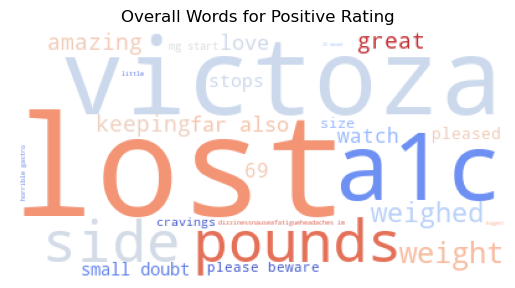

In [8]:
## Creating the word cloud
wordcloud = WordCloud(background_color='white', colormap='coolwarm')
wordcloud.generate_from_frequencies(pos_dic)
plt.imshow(wordcloud)
plt.title('Overall Words for Positive Rating')
plt.axis("off")
plt.show()

## Most Negative Words

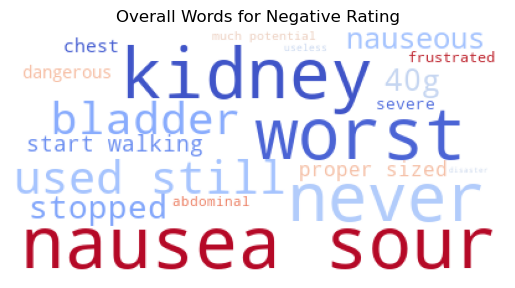

In [9]:

## Creating the word cloud
wordcloud = WordCloud(background_color='white', colormap='coolwarm')
wordcloud.generate_from_frequencies(neg_dic)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Overall Words for Negative Rating')
plt.show()